#### Authors : Ido Nathan and Tomer Yona 


## Machine Learning Ex2 - Stocks Clustering

#### Imports

In [184]:
# Basic imports
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import pandas_datareader as dr
import pandas_datareader.data as pdrd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime  
import io

# Data handling modules imports
import pandas as pd
import numpy as np
import requests

# ML modules imports
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score

# Visualization Modules imports
from graphviz import Source
from IPython.display import SVG
import matplotlib.pyplot as plt

# Resampling
from sklearn.utils import resample

### Job 1: Get sp500 pct on daily trade data

In [185]:
# Get sp500 names and symbols from slickcharts 
# Note: slickcharts wants us to pretend to be a browser - so we shall.

url = 'http://www.slickcharts.com/sp500/'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
r = requests.get(url, headers=header)
sp500 = pd.read_html(r.text)[0][["Company", "Symbol"]]
sp500

,Company,Symbol
0,Microsoft Corporation,MSFT
1,Apple Inc.,AAPL
2,Amazon.com Inc.,AMZN
3,Facebook Inc. Class A,FB
4,Alphabet Inc. Class A,GOOGL
...,...,...
500,Nordstrom Inc.,JWN
501,Under Armour Inc. Class A,UAA
502,Under Armour Inc. Class C,UA
503,Coty Inc. Class A,COTY


In [ ]:
# Dear grader: if previous method does'nt work - no need to pretend for wikipedia

# sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0].loc[:, ['Symbol', 'Security']]
# sp500

In [186]:
# Prepare dates (10/05/2019 to 11/05/2020) columns for the daily return table 

finish = datetime(2020, 5, 11)
start = datetime(2019, 5, 10)
some_company = sp500["Symbol"][0]
company_table = pdrd.DataReader(some_company, 'yahoo', start, finish)
dates = company_table.index
daily_return = pd.DataFrame(columns=dates)
daily_return

Date,2019-05-10,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-20,2019-05-21,2019-05-22,2019-05-23,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-11


In [187]:
# Append companies as rows in out daily return table using yahoo database
# Note1: Some names do not exist in yahoo database.
# Note2: This might take a while..
# Note3: 'Connection broken: IncompleteRead(0 bytes read)', IncompleteRead(0 bytes read)
# might happen due to problems with yahoo. Please try again if that occurs.

for _, comp in sp500.iterrows():
    try:
        row = pdrd.DataReader(comp.loc["Symbol"], 'yahoo', start, finish)
        row = row.loc[:, 'Close']
        row.name = comp.loc["Symbol"]
        daily_return = daily_return.append(row)
    except KeyError:
        print('Ignored bad company symbol: ' + str(comp.loc["Symbol"]))
        pass
daily_return

Ignored bad company symbol: BRK.B
Ignored bad company symbol: BF.B


Date,2019-05-10,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-20,2019-05-21,2019-05-22,2019-05-23,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-11
MSFT,127.129997,123.349998,124.730003,126.019997,128.929993,128.070007,126.220001,126.900002,127.669998,126.180000,...,169.809998,177.429993,179.210007,174.570007,178.839996,180.759995,182.539993,183.600006,184.679993,186.740005
AAPL,197.179993,185.720001,188.660004,190.919998,190.080002,189.000000,183.089996,186.600006,182.779999,179.660004,...,278.579987,287.730011,293.799988,289.070007,293.160004,297.559998,300.630005,303.739990,310.130005,315.010010
AMZN,1889.979980,1822.680054,1840.119995,1871.150024,1907.569946,1869.000000,1858.969971,1857.520020,1859.680054,1815.479980,...,2314.080078,2372.709961,2474.000000,2286.040039,2315.989990,2317.800049,2351.260010,2367.610107,2379.610107,2409.000000
FB,188.339996,181.539993,180.729996,186.270004,186.990005,185.300003,182.720001,184.820007,185.320007,180.869995,...,182.910004,194.190002,204.710007,202.270004,205.259995,207.070007,208.470001,211.259995,212.350006,213.179993
GOOGL,1167.640015,1136.589966,1124.859985,1170.800049,1184.500000,1168.780029,1144.660034,1154.439941,1155.849976,1145.339966,...,1232.589966,1342.180054,1346.699951,1317.319946,1322.900024,1349.020020,1345.430054,1369.280029,1384.339966,1403.589966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JWN,39.369999,37.599998,38.049999,37.430000,36.930000,37.090000,37.459999,37.849998,34.349998,33.810001,...,20.620001,20.379999,18.780001,17.660000,17.860001,17.340000,17.139999,17.290001,18.030001,17.120001
UAA,21.790001,20.950001,21.629999,21.360001,21.879999,23.580000,23.740000,23.870001,24.270000,23.459999,...,10.830000,10.870000,10.420000,9.800000,9.690000,9.380000,9.190000,9.610000,9.980000,9.010000
UA,19.230000,18.530001,19.129999,18.950001,19.360001,20.700001,20.860001,21.160000,21.370001,20.850000,...,9.640000,9.790000,9.270000,8.760000,8.710000,8.460000,8.230000,8.610000,8.940000,8.000000
COTY,11.730000,11.730000,12.120000,13.290000,13.240000,13.500000,13.500000,13.510000,13.120000,13.110000,...,5.810000,5.460000,5.450000,5.180000,5.330000,5.230000,4.890000,4.930000,5.200000,4.780000


In [189]:
# Calculate change precentage between some sample and it's previous
daily_return_pct = daily_return.apply(pd.Series.pct_change, axis=1)
daily_return_pct

Date,2019-05-10,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-20,2019-05-21,2019-05-22,2019-05-23,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-11
MSFT,NaN,-0.029733,0.011188,0.010342,0.023092,-0.006670,-0.014445,0.005387,0.006068,-0.011671,...,-0.024361,0.044874,0.010032,-0.025891,0.024460,0.010736,0.009847,0.005807,0.005882,0.011154
AAPL,NaN,-0.058119,0.015830,0.011979,-0.004400,-0.005682,-0.031270,0.019171,-0.020472,-0.017070,...,-0.016209,0.032845,0.021096,-0.016099,0.014149,0.015009,0.010317,0.010345,0.021038,0.015735
AMZN,NaN,-0.035609,0.009568,0.016863,0.019464,-0.020219,-0.005367,-0.000780,0.001163,-0.023768,...,-0.026061,0.025336,0.042690,-0.075974,0.013101,0.000782,0.014436,0.006954,0.005068,0.012351
FB,NaN,-0.036105,-0.004462,0.030654,0.003865,-0.009038,-0.013923,0.011493,0.002705,-0.024013,...,-0.024480,0.061670,0.054174,-0.011919,0.014782,0.008818,0.006761,0.013383,0.005160,0.003909
GOOGL,NaN,-0.026592,-0.010320,0.040841,0.011701,-0.013271,-0.020637,0.008544,0.001221,-0.009093,...,-0.030113,0.088910,0.003368,-0.021816,0.004236,0.019744,-0.002661,0.017727,0.010998,0.013906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JWN,NaN,-0.044958,0.011968,-0.016294,-0.013358,0.004333,0.009976,0.010411,-0.092470,-0.015720,...,0.017267,-0.011639,-0.078508,-0.059638,0.011325,-0.029115,-0.011534,0.008752,0.042799,-0.050471
UAA,NaN,-0.038550,0.032458,-0.012483,0.024345,0.077697,0.006785,0.005476,0.016757,-0.033375,...,0.037356,0.003693,-0.041398,-0.059501,-0.011225,-0.031992,-0.020256,0.045702,0.038502,-0.097194
UA,NaN,-0.036401,0.032380,-0.009409,0.021636,0.069215,0.007729,0.014382,0.009924,-0.024333,...,0.031016,0.015560,-0.053115,-0.055016,-0.005708,-0.028703,-0.027187,0.046173,0.038328,-0.105145
COTY,NaN,0.000000,0.033248,0.096535,-0.003762,0.019637,0.000000,0.000741,-0.028868,-0.000762,...,0.068015,-0.060241,-0.001832,-0.049541,0.028958,-0.018762,-0.065010,0.008180,0.054767,-0.080769


In [190]:
# Because first day will always be calculated as NaN in pct - drop it. 
del daily_return_pct['2019-05-10']
daily_return_pct

Date,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-11
MSFT,-0.029733,0.011188,0.010342,0.023092,-0.006670,-0.014445,0.005387,0.006068,-0.011671,0.000475,...,-0.024361,0.044874,0.010032,-0.025891,0.024460,0.010736,0.009847,0.005807,0.005882,0.011154
AAPL,-0.058119,0.015830,0.011979,-0.004400,-0.005682,-0.031270,0.019171,-0.020472,-0.017070,-0.003841,...,-0.016209,0.032845,0.021096,-0.016099,0.014149,0.015009,0.010317,0.010345,0.021038,0.015735
AMZN,-0.035609,0.009568,0.016863,0.019464,-0.020219,-0.005367,-0.000780,0.001163,-0.023768,0.004296,...,-0.026061,0.025336,0.042690,-0.075974,0.013101,0.000782,0.014436,0.006954,0.005068,0.012351
FB,-0.036105,-0.004462,0.030654,0.003865,-0.009038,-0.013923,0.011493,0.002705,-0.024013,0.001050,...,-0.024480,0.061670,0.054174,-0.011919,0.014782,0.008818,0.006761,0.013383,0.005160,0.003909
GOOGL,-0.026592,-0.010320,0.040841,0.011701,-0.013271,-0.020637,0.008544,0.001221,-0.009093,-0.005876,...,-0.030113,0.088910,0.003368,-0.021816,0.004236,0.019744,-0.002661,0.017727,0.010998,0.013906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JWN,-0.044958,0.011968,-0.016294,-0.013358,0.004333,0.009976,0.010411,-0.092470,-0.015720,-0.009169,...,0.017267,-0.011639,-0.078508,-0.059638,0.011325,-0.029115,-0.011534,0.008752,0.042799,-0.050471
UAA,-0.038550,0.032458,-0.012483,0.024345,0.077697,0.006785,0.005476,0.016757,-0.033375,0.003410,...,0.037356,0.003693,-0.041398,-0.059501,-0.011225,-0.031992,-0.020256,0.045702,0.038502,-0.097194
UA,-0.036401,0.032380,-0.009409,0.021636,0.069215,0.007729,0.014382,0.009924,-0.024333,0.002878,...,0.031016,0.015560,-0.053115,-0.055016,-0.005708,-0.028703,-0.027187,0.046173,0.038328,-0.105145
COTY,0.000000,0.033248,0.096535,-0.003762,0.019637,0.000000,0.000741,-0.028868,-0.000762,-0.002288,...,0.068015,-0.060241,-0.001832,-0.049541,0.028958,-0.018762,-0.065010,0.008180,0.054767,-0.080769


In [191]:
# Convert any other NaN's to 0's
final_daily_return = daily_return_pct.fillna(0)
final_daily_return

Date,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-11
MSFT,-0.029733,0.011188,0.010342,0.023092,-0.006670,-0.014445,0.005387,0.006068,-0.011671,0.000475,...,-0.024361,0.044874,0.010032,-0.025891,0.024460,0.010736,0.009847,0.005807,0.005882,0.011154
AAPL,-0.058119,0.015830,0.011979,-0.004400,-0.005682,-0.031270,0.019171,-0.020472,-0.017070,-0.003841,...,-0.016209,0.032845,0.021096,-0.016099,0.014149,0.015009,0.010317,0.010345,0.021038,0.015735
AMZN,-0.035609,0.009568,0.016863,0.019464,-0.020219,-0.005367,-0.000780,0.001163,-0.023768,0.004296,...,-0.026061,0.025336,0.042690,-0.075974,0.013101,0.000782,0.014436,0.006954,0.005068,0.012351
FB,-0.036105,-0.004462,0.030654,0.003865,-0.009038,-0.013923,0.011493,0.002705,-0.024013,0.001050,...,-0.024480,0.061670,0.054174,-0.011919,0.014782,0.008818,0.006761,0.013383,0.005160,0.003909
GOOGL,-0.026592,-0.010320,0.040841,0.011701,-0.013271,-0.020637,0.008544,0.001221,-0.009093,-0.005876,...,-0.030113,0.088910,0.003368,-0.021816,0.004236,0.019744,-0.002661,0.017727,0.010998,0.013906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JWN,-0.044958,0.011968,-0.016294,-0.013358,0.004333,0.009976,0.010411,-0.092470,-0.015720,-0.009169,...,0.017267,-0.011639,-0.078508,-0.059638,0.011325,-0.029115,-0.011534,0.008752,0.042799,-0.050471
UAA,-0.038550,0.032458,-0.012483,0.024345,0.077697,0.006785,0.005476,0.016757,-0.033375,0.003410,...,0.037356,0.003693,-0.041398,-0.059501,-0.011225,-0.031992,-0.020256,0.045702,0.038502,-0.097194
UA,-0.036401,0.032380,-0.009409,0.021636,0.069215,0.007729,0.014382,0.009924,-0.024333,0.002878,...,0.031016,0.015560,-0.053115,-0.055016,-0.005708,-0.028703,-0.027187,0.046173,0.038328,-0.105145
COTY,0.000000,0.033248,0.096535,-0.003762,0.019637,0.000000,0.000741,-0.028868,-0.000762,-0.002288,...,0.068015,-0.060241,-0.001832,-0.049541,0.028958,-0.018762,-0.065010,0.008180,0.054767,-0.080769


#### Formalization


In [192]:
X = final_daily_return

### Job 2: Use various clustering models to find clusters for the sp500 

##### Helper Functions

In [193]:
def comps_of_clust(model_clusters, samples):
  '''
  return a dataframe with columns the clusters (0, 1, 2 etc..)
  and rows the companies. So it's in the form of a table and when
  time comes to visualize the symbols at each cluster 'c' it's as easy
  as asking the table for all the rows in column 'c'.
  example: clusters.iloc(c)
  '''
  columns = np.unique(model_clusters)
  names = [samples.index[model_clusters == cluster] for cluster in columns]
  biggenst_cluster_len = np.max([len(cluster) for cluster in names])
  data = dict(zip(columns, names))
  names = [np.append(cluster, np.full(biggenst_cluster_len - len(cluster), None)) for cluster in names]
  data = dict(zip(columns, names))
  clusters = pd.DataFrame(data)
  return clusters

### Kmeans

when k = 10, silhouette score is: 0.03440923998442466


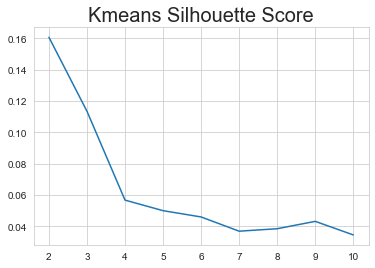

In [194]:
# Choose from various K's for Kmeans using silhouette score
# Note: K is inconsistent sometimes 3 other times 2.

k_lst = []
score_lst = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  preds = kmeans.predict(X)
  score = silhouette_score(X, preds)
  k_lst.append(i)
  score_lst.append(score)


# plot the score
plt.title("Kmeans Silhouette Score", size=20)
plt.plot(k_lst, score_lst)
print("when k = " + str(i) + ", silhouette score is: " + str(score))

#### As requested: according to silhouette score best K is 2 or 3, elbow is created once for 2 otherwise for 3.
#### We would like to show, however, that other measurments might think of another best K
#### Elbow Method: WCSS

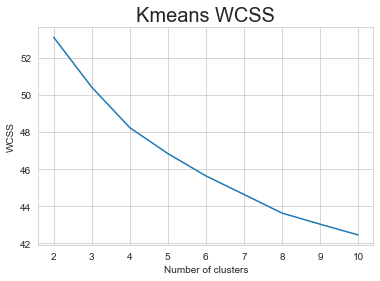

In [195]:
# Another way to find the best k is by visualizing the WCSS kmeans elbow

wcss = []

for i in range(2,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )

     kmeans.fit(X)

     wcss.append(kmeans.inertia_)#kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.#4.Plot the elbow graphplt.plot(range(1,11),wcss)

plt.title('Kmeans WCSS', size=20)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(range(2,11), wcss)
plt.show()

##### According to The Elbow Method of WCSS best K is 4
##### Let's see another Elbow Method: MinMaxScaler

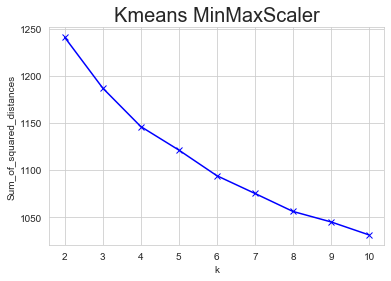

In [196]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)

Sum_of_squared_distances = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Kmeans MinMaxScaler', size=20)
plt.show()

##### With MinMaxScaler it appears that the best K is more like 4

##### Despite that, as requested in the exercise, we proceed with 3 as the best K found in the silhouette score. 
##### Let us now see the clusters

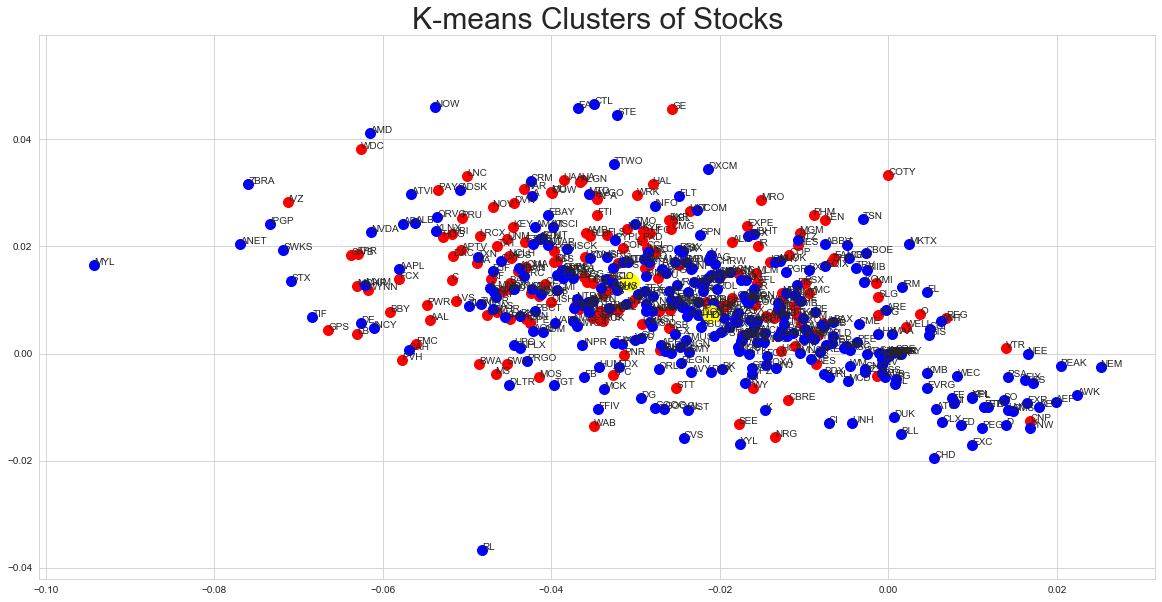

In [197]:
# Show kmeans clusters with k = 3 which showed the best silhouette score

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

X_vals = X.values
plt.figure(figsize=(20, 10))
plt.scatter(X_vals[y_kmeans==0, 0], X_vals[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_vals[y_kmeans==1, 0], X_vals[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
# plt.scatter(X_vals[y_kmeans==2, 0], X_vals[y_kmeans==2, 1], s=100, c='cyan', label ='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('K-means Clusters of Stocks', size=30)

# # add annotation
for i in range(503):
  plt.text(X.values[i, 0], X.values[i, 1], s=X.index[i])
plt.show()

##### The two yellow dots represent the centroids
##### The low quality of separation is reasonable considering the overall low (0.16) silhouette score.
##### Let us remember that the silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Here we see low cohesion and low separation.

### AgglomerativeClustering

when k = 3, silhoutete score is: 0.03793281206586314


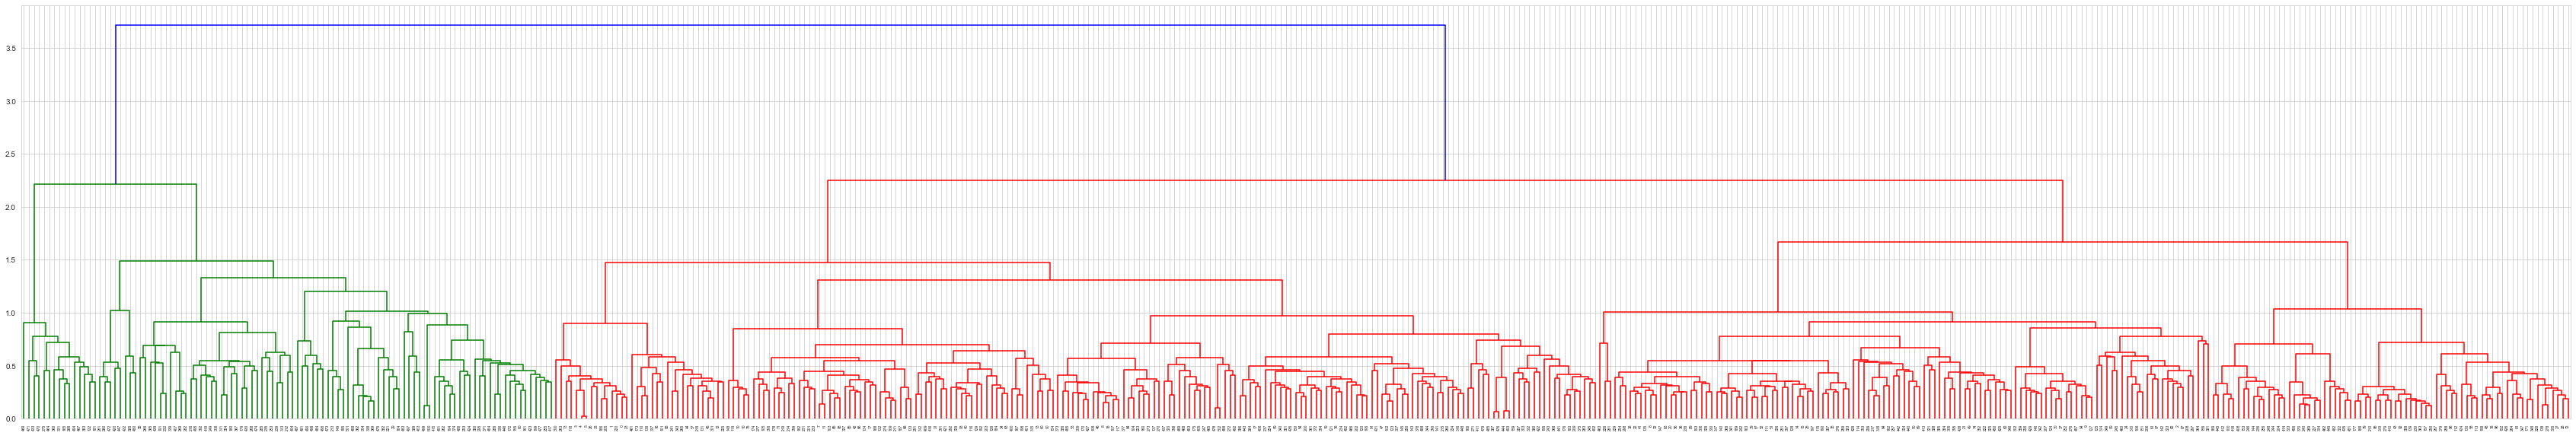

In [198]:
#dendogram ward

plt.figure(figsize=(60,10))
dendrogram_ward = sch.dendrogram(sch.linkage(X,method='ward'))

# Silloutes are needed. 
#how many clusters are needed not sure....
h_clustering = AgglomerativeClustering(n_clusters=3,linkage='ward')
preds = h_clustering.fit_predict(X)
score = silhouette_score(X, preds)
print("when k = " + str(3) + ", silhoutete score is: " + str(score))


when k = 2, silhoutete score is: 0.35604333099395946


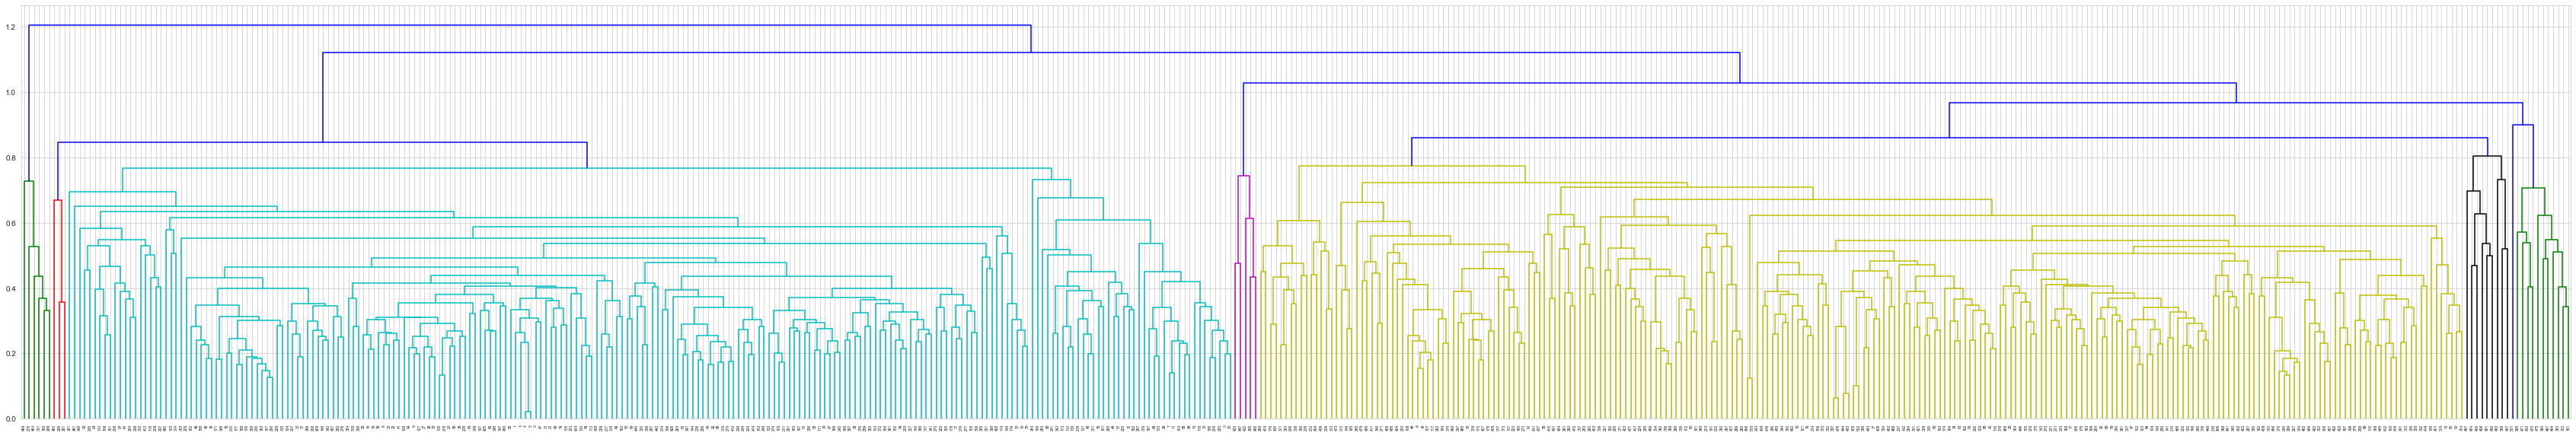

In [199]:
#dendogram complete

plt.figure(figsize=(60,10))
dendrogram_ward = sch.dendrogram(sch.linkage(X,method='complete'))

#how many clusters are needed not sure....
h_clustering = AgglomerativeClustering(n_clusters=2,linkage='complete')
preds = h_clustering.fit_predict(X)
score = silhouette_score(X, preds)
print("when k = " + str(2) + ", silhoutete score is: " + str(score))

when k = 2, silhoutete score is: 0.5226914472994467


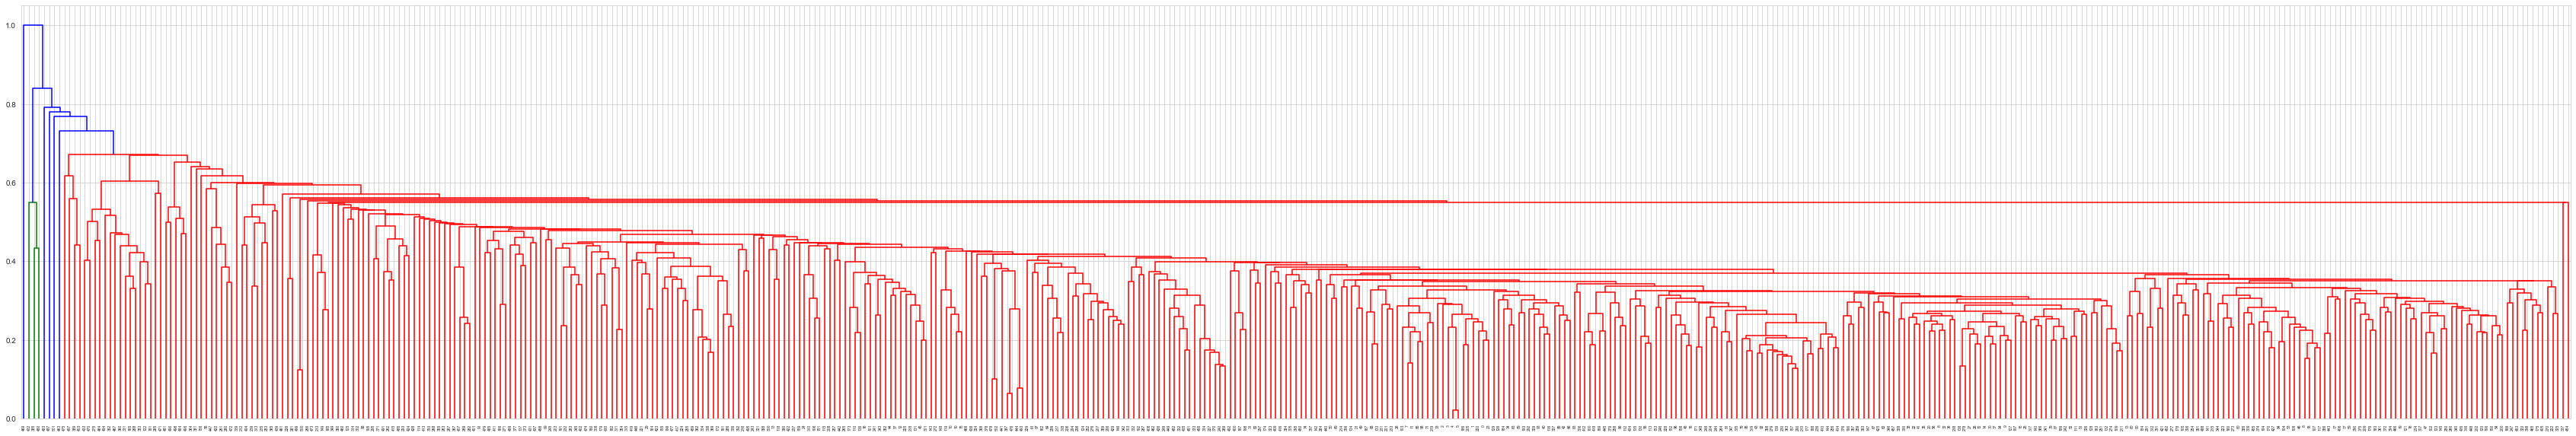

In [200]:
#dendogram average

plt.figure(figsize=(60,10))
dendrogram_ward = sch.dendrogram(sch.linkage(X,method='average'))

#how many clusters are needed not sure....
h_clustering = AgglomerativeClustering(n_clusters=2,linkage='average')
preds = h_clustering.fit_predict(X)
score = silhouette_score(X, preds)
print("when k = " + str(2) + ", silhoutete score is: " + str(score))

when k = 2, silhoutete score is: 0.5226914472994467


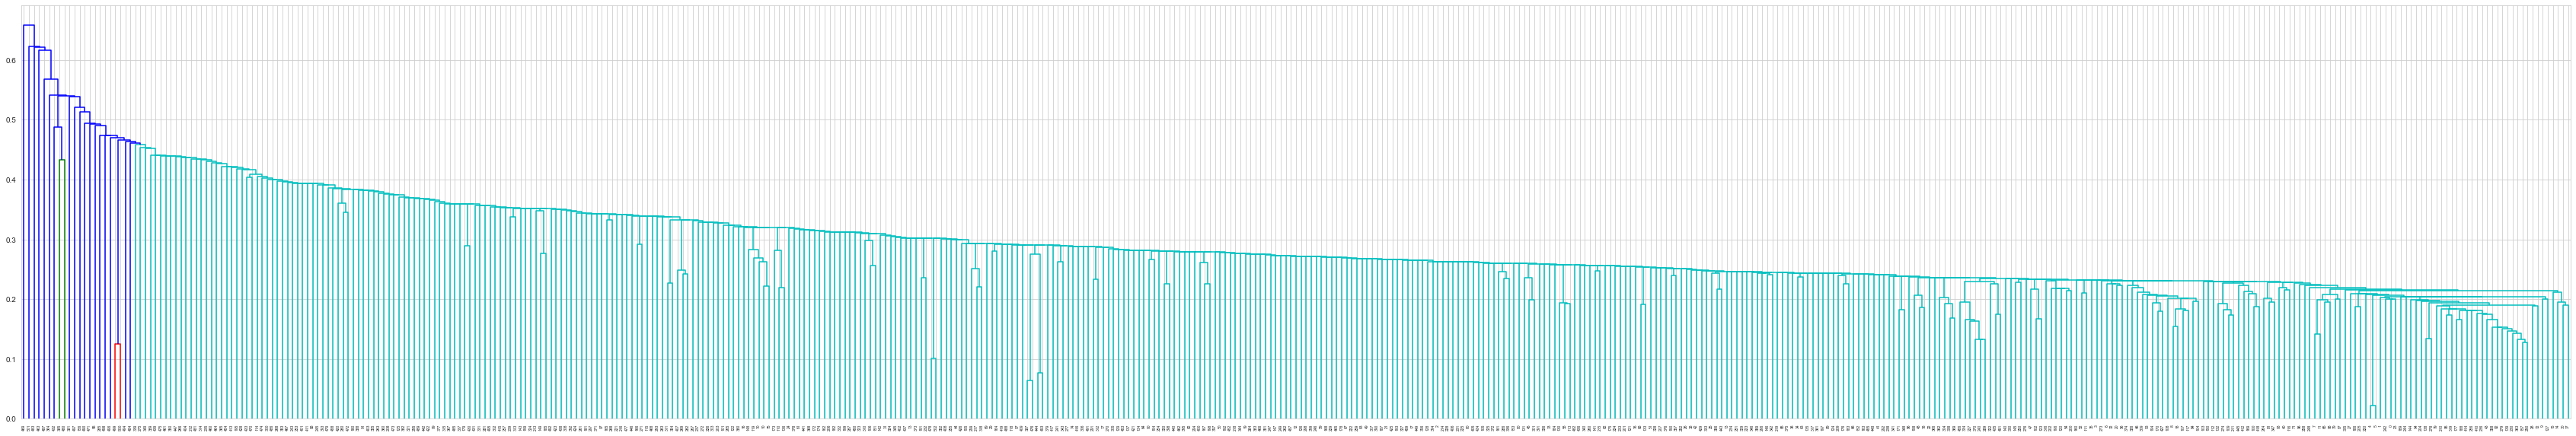

In [203]:
#dendogram single

plt.figure(figsize=(60,10))
dendrogram_ward = sch.dendrogram(sch.linkage(X,method='single'))


#how many clusters are needed not sure....
h_clustering = AgglomerativeClustering(n_clusters=2,linkage='single')
preds = h_clustering.fit_predict(X)
score = silhouette_score(X, preds)
print("when k = " + str(2) + ", silhoutete score is: " + str(score))

### GMM

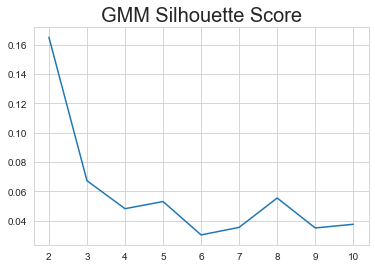

In [205]:
k_lst = []
score_lst = []
for i in range(2, 11):
  gmm = GMM(n_components=i)
  gmm.fit(X)
  preds = gmm.predict(X)
  score = silhouette_score(X, preds)
  k_lst.append(i)
  score_lst.append(score)
plt.title("GMM Silhouette Score", size=20)
plt.plot(k_lst, score_lst)

#### Looks like K=2 is best here

In [206]:
# Check silhouette score for GMM

components = 2
gmm = GMM(n_components=components)
gmm.fit(X)
pred = gmm.predict(X)
score = silhouette_score(X, pred)
print("with components = " + str(components) + ", silhoutete score is: " + str(score))

with components = 2, silhoutete score is: 0.16499248732325117


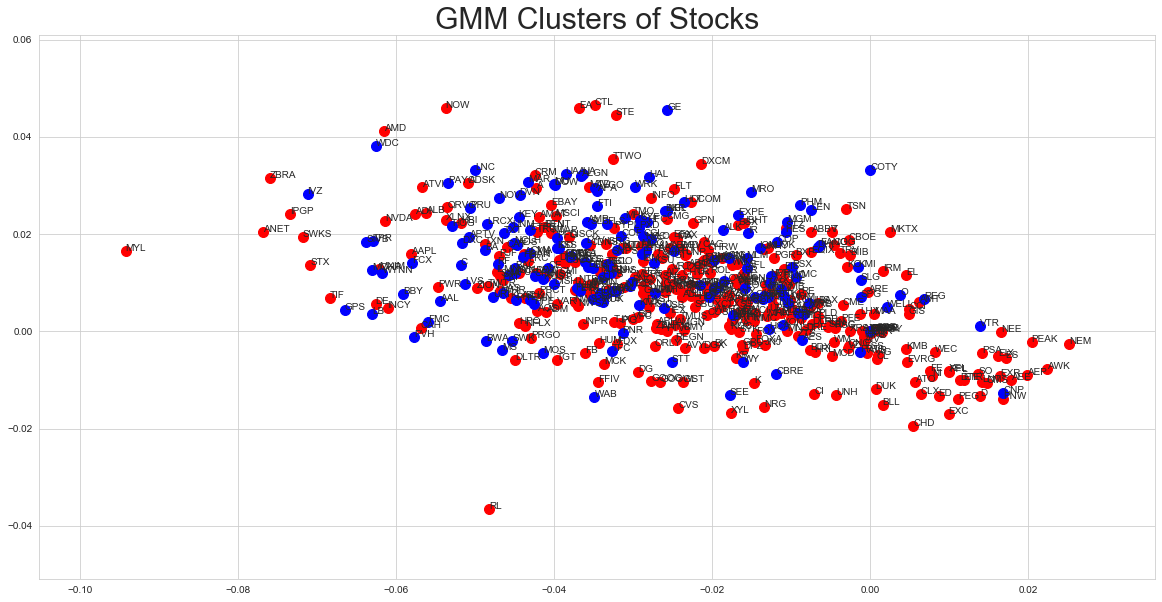

In [207]:
#Plotting the cluster obtained using GMM
components = 2
gmm = GMM(n_components=components)
gmm.fit(X)
y_gmm = gmm.predict(X)

X_vals = X.values
plt.figure(figsize=(20, 10))
plt.scatter(X_vals[y_gmm==0, 0], X_vals[y_gmm==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_vals[y_gmm==1, 0], X_vals[y_gmm==1, 1], s=100, c='blue', label ='Cluster 2')

plt.title('GMM Clusters of Stocks', size=30)

for i in range(503):
    plt.text(x=(X_vals[i, 0]), y=(X_vals[i, 1]), s=X.index[i]) # Blue

### Job 3: Select one model and show cluster's average daily return graph

### We have selected GMM

In [208]:
# store the clusters of companies 

CLUST = comps_of_clust(y_gmm, X)
CLUST.dropna(inplace=True)

In [209]:
# Get average daily return per cluster

clust1 = X.T[CLUST[0].values]
clust2 = X.T[CLUST[1].values]

clust1 = clust1.T
clust2 = clust2.T

clust1_avg = pd.DataFrame(clust1.mean(axis=0)).T
clust2_avg = pd.DataFrame(clust2.mean(axis=0)).T

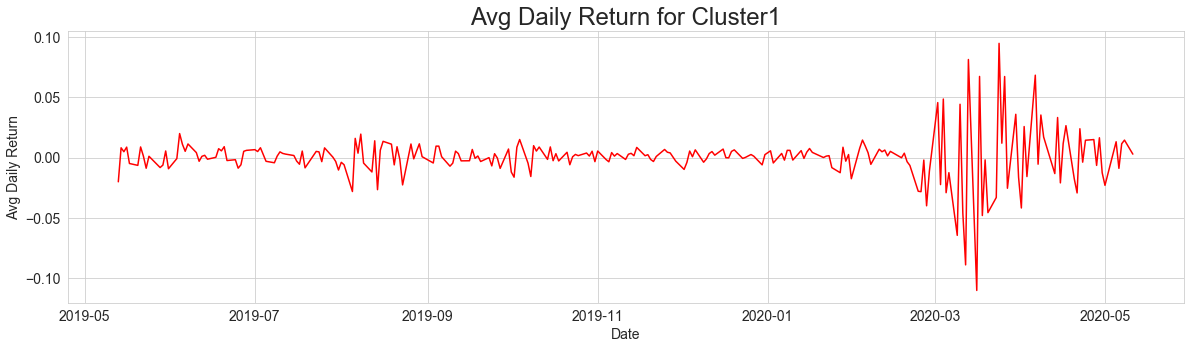

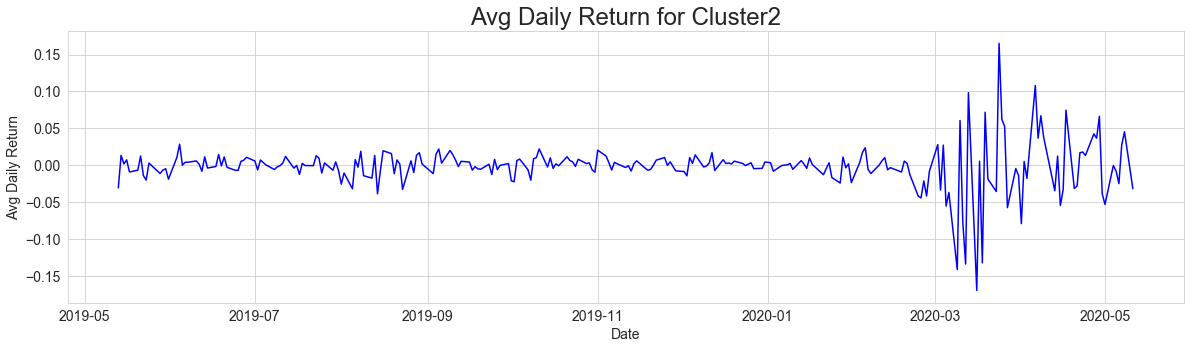

In [210]:
# plot the graphs representing the avg daily return

# For first cluster 

plt.figure(figsize=(20, 5))
plt.title('Avg Daily Return for Cluster1',fontsize=24)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Avg Daily Return',fontsize=14)

plt.tick_params(axis='both',labelsize=14)
plt.plot(clust1_avg.columns.to_list(), clust1_avg.iloc[0, :], color='red')

# For second cluster

plt.figure(figsize=(20, 5))
plt.title('Avg Daily Return for Cluster2',fontsize=24)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Avg Daily Return',fontsize=14)

plt.tick_params(axis='both',labelsize=14)
plt.plot(clust2_avg.columns.to_list(), clust2_avg.iloc[0, :], color='blue')

In [211]:
# Now filter to certain dates: 01/01/2020 - 11/05/2020

filtered_cluster1 = pd.DataFrame(clust1_avg.loc[0, "01/01/2020": "11/05/2020"]).T
filtered_cluster2 = pd.DataFrame(clust2_avg.loc[0, "01/01/2020": "11/05/2020"]).T

filtered_cluster1

Date,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-13,2020-01-14,2020-01-15,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-11
0,0.005617,-0.004449,0.003441,-0.00211,0.006029,0.005991,-0.00206,0.00579,-0.000671,0.004461,...,-0.006467,0.01643,-0.012587,-0.022996,0.00399,0.01314,-0.008915,0.01148,0.014495,0.002866


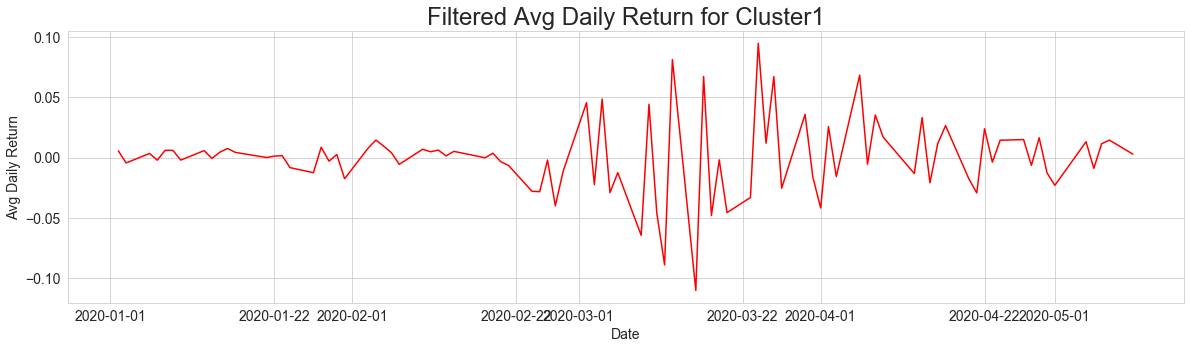

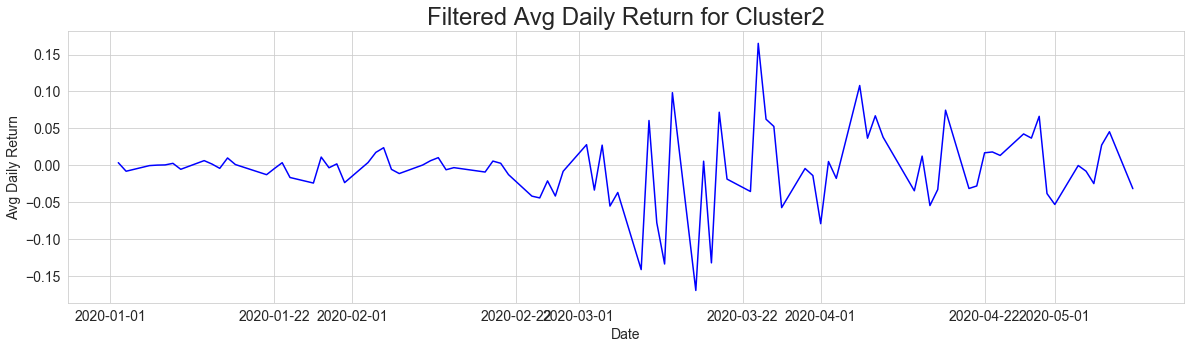

In [212]:
# and show new graphs for filtered clusters

# plot the graphs representing the avg daily return

# For first cluster 

plt.figure(figsize=(20, 5))
plt.title('Filtered Avg Daily Return for Cluster1',fontsize=24)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Avg Daily Return',fontsize=14)

plt.tick_params(axis='both',labelsize=14)
plt.plot(filtered_cluster1.columns.to_list(), filtered_cluster1.iloc[0, :], color='red')

# For second cluster

plt.figure(figsize=(20, 5))
plt.title('Filtered Avg Daily Return for Cluster2',fontsize=24)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Avg Daily Return',fontsize=14)

plt.tick_params(axis='both',labelsize=14)
plt.plot(filtered_cluster2.columns.to_list(), filtered_cluster2.iloc[0, :], color='blue')

### Yes when the graph is more around these dates it's easier to see the disturbance the COVID-19 did to the stocks

### Now focus on these dates to find the companies that were more badly affected hence lower daily return precentages.

In [213]:
X_filtered = X.loc[:, "01/01/2020": "11/05/2020"]

In [214]:
# Now find n companies that were more badly affected due to COVID-19

n = 5

clust1 = X_filtered.T[CLUST[0].values]
clust2 = X_filtered.T[CLUST[1].values]

affected_in_clust1 = pd.DataFrame(clust1.mean(axis=0))
# badly affected in clust1
affected = affected_in_clust1.nsmallest(n, affected_in_clust1.columns[0])

cluster1_companies = []
for aff_comp in affected.index:
    comp_name = sp500.loc[sp500['Symbol'] == aff_comp]
    cluster1_companies.append(comp_name)
print("Companies that were most affected from cluster1")
cluster1_companies

Companies that were most affected from cluster1


[           Company Symbol
 101  Chubb Limited     CB,                   Company Symbol
 78  Booking Holdings Inc.   BKNG,                                  Company Symbol
 161  Bank of New York Mellon Corporation     BK,                                 Company Symbol
 201  Johnson Controls International plc    JCI,                           Company Symbol
 163  Walgreens Boots Alliance Inc    WBA]

In [215]:
# badly affected in clust2
affected_in_clust2 = pd.DataFrame(clust2.mean(axis=0))

affected2 = affected_in_clust2.nsmallest(n, affected_in_clust2.columns[0])

cluster2_companies = []
for aff_comp in affected2.index:
    comp_name = sp500.loc[sp500['Symbol'] == aff_comp]
    cluster2_companies.append(comp_name)
print("Companies that were most affected from cluster2")
cluster2_companies

Companies that were most affected from cluster2


[                                 Company Symbol
 482  Norwegian Cruise Line Holdings Ltd.   NCLH,
                            Company Symbol
 422  United Airlines Holdings Inc.    UAL,
                   Company Symbol
 434  Carnival Corporation    CCL,
                           Company Symbol
 387  Royal Caribbean Cruises Ltd.    RCL,
             Company Symbol
 496  TechnipFMC Plc    FTI]

### JOB 4: PCA on 50 random stocks with the GMM clustering 

In [216]:
# Randomly choose 50 companies

chosen_idx = np.random.choice(449, replace = True, size = 50) 
  
X50 = X.iloc[chosen_idx] 
X50.head()

Date,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-11
NRG,-0.013401,-0.015485,-0.006898,-0.005279,-0.006145,0.009275,0.021999,-0.005450,-0.026575,0.000000,...,0.000891,0.027588,-0.032044,-0.016701,-0.000607,-0.001821,-0.003345,-0.020134,0.020237,-0.008239
CTVA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024648,0.032837,-0.031793,-0.026728,-0.002746,0.029898,-0.044691,0.057577,-0.017769,-0.061586
LNC,-0.050038,0.033183,-0.005613,0.016620,-0.012955,0.000625,0.014678,-0.010465,-0.030793,0.018774,...,0.057734,0.085731,-0.030874,-0.084297,0.007081,-0.007337,-0.078842,0.162487,0.054070,-0.037381
CBOE,-0.002707,0.018712,-0.011326,0.013188,0.005131,0.017487,-0.002787,0.004192,-0.014658,0.006967,...,0.014000,0.008325,0.000604,-0.054035,0.004680,0.047538,-0.014756,0.020312,0.007239,-0.002995
CPB,-0.000516,-0.001291,0.008017,-0.001283,0.005137,-0.009711,-0.008516,-0.014576,0.006603,-0.015219,...,-0.005074,-0.015692,-0.003986,0.008603,0.007340,0.001969,-0.006289,-0.006329,0.020302,0.013656


In [228]:
# Fit PCA with 2 componenets on the random stocks

pca = PCA(n_components=2).fit(X50.values)
pca_transformed = pca.transform(X.values)

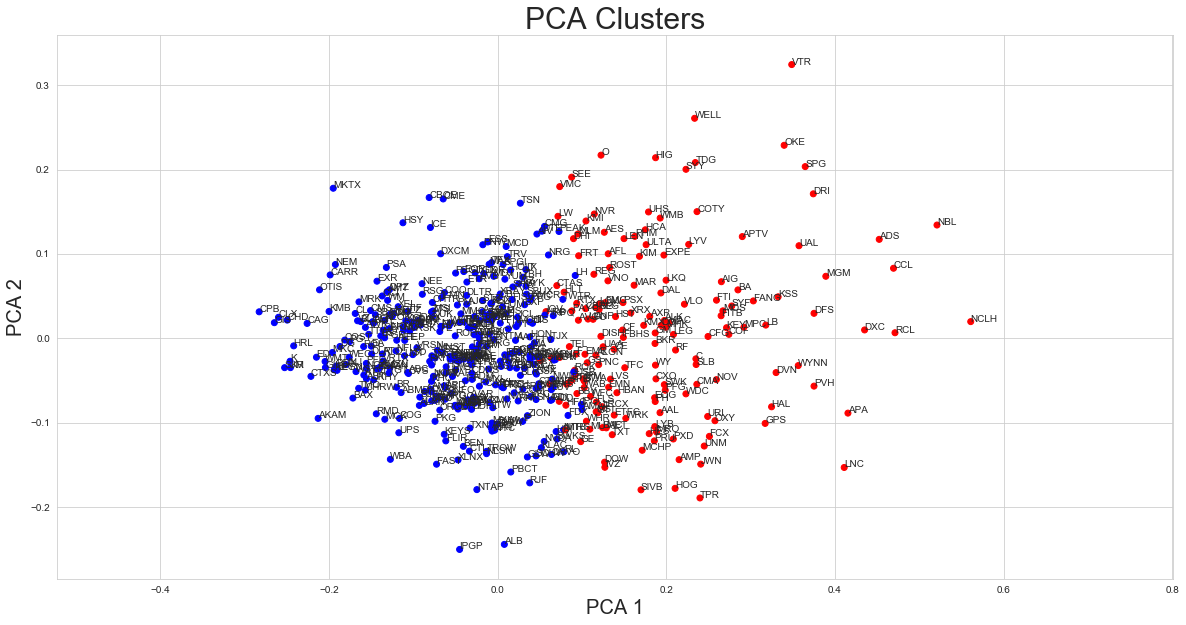

In [229]:
# Show pca clusters using the previous gmm clustering

plt.figure(figsize=(20,10))
plt.title("PCA Clusters", size=30)
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=y_gmm, cmap='bwr')
plt.xlabel("PCA 1", size=20)
plt.ylabel("PCA 2", size=20)
plt.axis('equal');
for i in range(503):
  plt.text(x=(pca_transformed[i, 0]), y=(pca_transformed[i, 1]), s=X.index[i])

### PCA Variance 

In [230]:
variance = pca.explained_variance_ratio_
i = 0
for var in variance:
    print("Component " + str(i) + " holds " + str(round(var*100,2)) + "%" + " of the variance")
    i += 1

Component 0 holds 19.53% of the variance
Component 1 holds 10.99% of the variance


### JOB5: Use the PCA as a preprocess to the GMM. Any better results using this scheme?

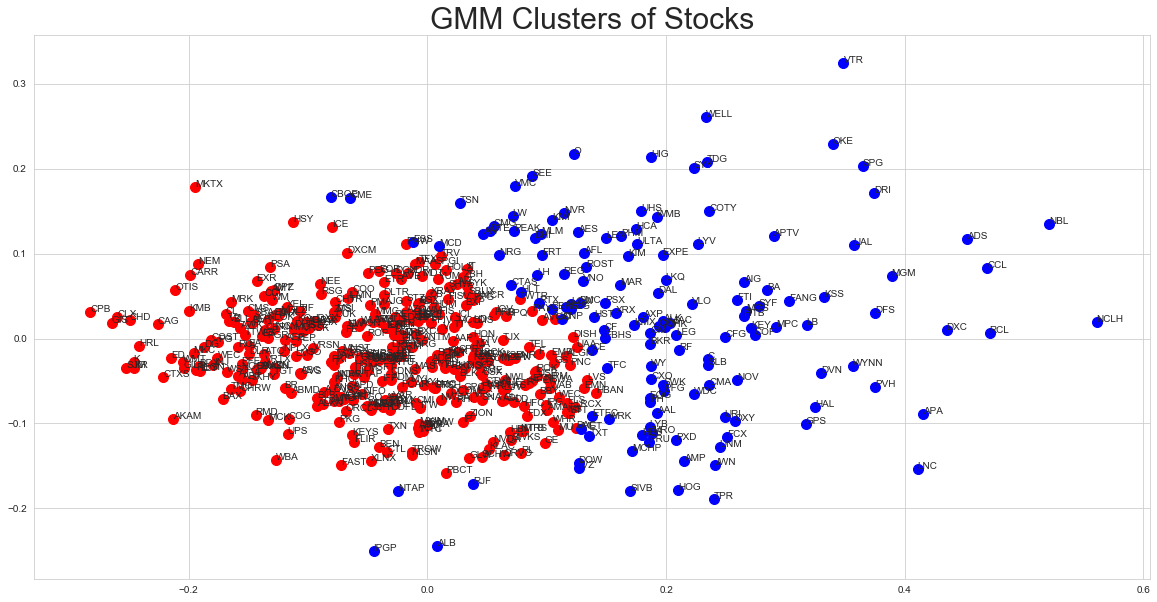

In [233]:
#Plotting the cluster obtained using GMM
components = 2
gmm = GMM(n_components=components)
gmm.fit(pca_tranformed)
y_gmm = gmm.predict(pca_tranformed)

plt.figure(figsize=(20, 10))
plt.scatter(pca_tranformed[y_gmm==0, 0], pca_tranformed[y_gmm==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(pca_tranformed[y_gmm==1, 0], pca_tranformed[y_gmm==1, 1], s=100, c='blue', label ='Cluster 2')

plt.title('GMM Clusters of Stocks', size=30)

for i in range(503):
    plt.text(x=(pca_tranformed[i, 0]), y=(pca_tranformed[i, 1]), s=X.index[i]) # Blue

### Now it appears the clusters took different companies.
### In addition it appears that the clusters centers and arrangement, are more clear to see.

In [234]:
# Let's see the silhouette score now

score = silhouette_score(pca_tranformed, y_gmm)
score

0.4325695590619563

### GMM Silhouette score was indeed improved by preprocessing the data with PCA!